In [3]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import  binom, poisson, expon, norm, t, chi2, f

In [4]:
dados_origem = pd.read_csv('BankChurners.csv')

In [5]:
dados_origem

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [6]:
idade_maxima = max(dados_origem['Customer_Age'])
idade_maxima

73

In [7]:
idade_maxima = max(dados_origem['Customer_Age'])
idade_media = np.mean(dados_origem['Customer_Age'])
idade_dp = np.std(dados_origem['Customer_Age'])

In [8]:
resultados = np.linspace(0, 73, 141)

In [9]:
probabilidade = norm.pdf(x=resultados, loc=idade_media, scale= idade_dp)

In [10]:
dados_normal = pd.DataFrame(np.transpose([resultados, probabilidade]), columns=['resultados', 'probabilidade'])

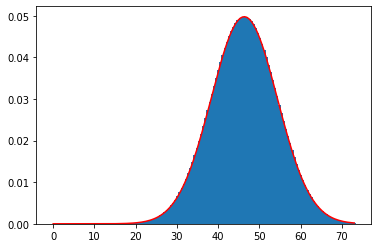

In [11]:
plt.bar(dados_normal['resultados'], dados_normal['probabilidade'])
plt.plot(dados_normal['resultados'], dados_normal['probabilidade'], color = 'red')

# Discretas


- 1

In [12]:
escola_genero_masc = dados_origem[dados_origem['Gender'] == 'M'].groupby('Education_Level').agg(contagem_masculino = pd.NamedAgg('Gender', 'count'))

In [13]:
escola_genero_fem = dados_origem[dados_origem['Gender'] == 'F'].groupby('Education_Level').agg(contagem_feminino = pd.NamedAgg('Gender', 'count'))

In [14]:
escola_genero = pd.merge(escola_genero_masc, escola_genero_fem, on = 'Education_Level', how = 'inner').reset_index()
escola_genero

,Education_Level,contagem_masculino,contagem_feminino
0,College,481,532
1,Doctorate,194,257
2,Graduate,1458,1670
3,High School,985,1028
4,Post-Graduate,253,263
5,Uneducated,691,796
6,Unknown,707,812


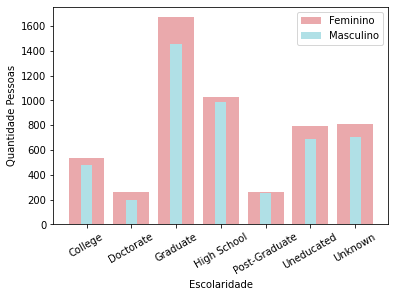

In [15]:
plt.bar(escola_genero['Education_Level'], escola_genero['contagem_feminino'], color = '#eaa9ac', label= 'Feminino')
plt.bar(escola_genero['Education_Level'], escola_genero['contagem_masculino'], color= '#b0e0e6', label= 'Masculino', width= 0.25)
plt.xticks(rotation=30)
plt.ylabel('Quantidade Pessoas')
plt.xlabel('Escolaridade')
plt.legend()
plt.show()

- 2

In [16]:
cartao_genero_masc = dados_origem[dados_origem['Gender'] == 'M'].groupby('Card_Category').agg(contagem_masculino = pd.NamedAgg('Gender', 'count'))

In [17]:
cartao_genero_fem = dados_origem[dados_origem['Gender'] == 'F'].groupby('Card_Category').agg(contagem_feminino = pd.NamedAgg('Gender', 'count'))

In [18]:
cartao_genero = pd.merge(cartao_genero_masc, cartao_genero_fem, on = 'Card_Category', how = 'inner').reset_index()
cartao_genero

,Card_Category,contagem_masculino,contagem_feminino
0,Blue,4335,5101
1,Gold,78,38
2,Platinum,11,9
3,Silver,345,210


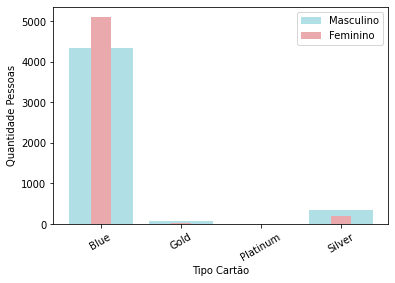

In [19]:
plt.bar(cartao_genero['Card_Category'], cartao_genero['contagem_masculino'], color = '#b0e0e6', label= 'Masculino')
plt.bar(cartao_genero['Card_Category'], cartao_genero['contagem_feminino'], color= '#eaa9ac', label= 'Feminino', width= 0.25)
plt.xticks(rotation=30)
plt.ylabel('Quantidade Pessoas')
plt.xlabel('Tipo Cartão')
plt.legend()
plt.show()

- 3

In [20]:
cartao_on = dados_origem[dados_origem['Attrition_Flag'] == 'Existing Customer'].groupby('Card_Category').agg(contagem_on = pd.NamedAgg('Attrition_Flag', 'count'))
cartao_off = dados_origem[dados_origem['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category').agg(contagem_off = pd.NamedAgg('Attrition_Flag', 'count'))
cartao_status = pd.merge(cartao_on, cartao_off, on = 'Card_Category', how = 'inner').reset_index()
cartao_status

,Card_Category,contagem_on,contagem_off
0,Blue,7917,1519
1,Gold,95,21
2,Platinum,15,5
3,Silver,473,82


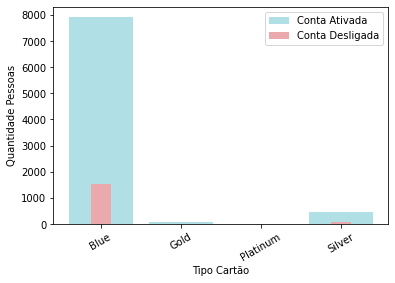

In [21]:
plt.bar(cartao_status['Card_Category'], cartao_status['contagem_on'], color = '#b0e0e6', label= 'Conta Ativada')
plt.bar(cartao_status['Card_Category'], cartao_status['contagem_off'], color= '#eaa9ac', label= 'Conta Desligada', width= 0.25)
plt.xticks(rotation=30)
plt.ylabel('Quantidade Pessoas')
plt.xlabel('Tipo Cartão')
plt.legend()
plt.show()

- 4

In [22]:
conta_on = dados_origem[dados_origem['Attrition_Flag'] == 'Existing Customer']
conta_off = dados_origem[dados_origem['Attrition_Flag'] == 'Attrited Customer']
renda_on = conta_on.groupby('Income_Category').agg(contagem_on = pd.NamedAgg('Attrition_Flag', 'count'))
renda_off = conta_off.groupby('Income_Category').agg(contagem_off = pd.NamedAgg('Attrition_Flag', 'count'))
renda_status = pd.merge(renda_on, renda_off, on = 'Income_Category', how = 'inner').reset_index()
renda_status

,Income_Category,contagem_on,contagem_off
0,$120K +,601,126
1,$40K - $60K,1519,271
2,$60K - $80K,1213,189
3,$80K - $120K,1293,242
4,Less than $40K,2949,612
5,Unknown,925,187


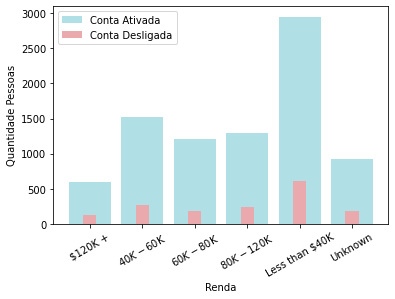

In [23]:
plt.bar(renda_status['Income_Category'], renda_status['contagem_on'], color = '#b0e0e6', label= 'Conta Ativada')
plt.bar(renda_status['Income_Category'], renda_status['contagem_off'], color= '#eaa9ac', label= 'Conta Desligada', width= 0.25)
plt.xticks(rotation=30)
plt.ylabel('Quantidade Pessoas')
plt.xlabel('Renda')
plt.legend()
plt.show()

- 5

In [24]:
lim_on_media = dados_origem.groupby('Attrition_Flag').agg(contagem = pd.NamedAgg('Credit_Limit', 'mean')).reset_index()
lim_on_media

,Attrition_Flag,contagem
0,Attrited Customer,8136.039459
1,Existing Customer,8726.877518


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

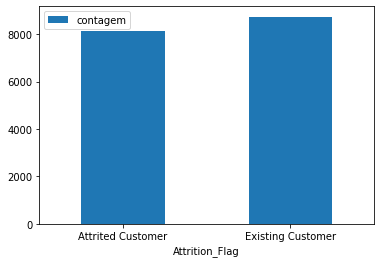

In [25]:
lim_on_media.plot.bar(x= 'Attrition_Flag', y= 'contagem')
plt.xticks(rotation=0)

- 6

In [26]:
conta_on = dados_origem[dados_origem['Attrition_Flag'] == 'Existing Customer']
conta_off = dados_origem[dados_origem['Attrition_Flag'] == 'Attrited Customer']
escola_on = conta_on.groupby('Education_Level').agg(contagem_on = pd.NamedAgg('Education_Level', 'count'))
escola_off = conta_off.groupby('Education_Level').agg(contagem_off = pd.NamedAgg('Education_Level', 'count'))
escola_status = pd.merge(escola_on, escola_off, on = 'Education_Level', how = 'inner').reset_index()
escola_status

,Education_Level,contagem_on,contagem_off
0,College,859,154
1,Doctorate,356,95
2,Graduate,2641,487
3,High School,1707,306
4,Post-Graduate,424,92
5,Uneducated,1250,237
6,Unknown,1263,256


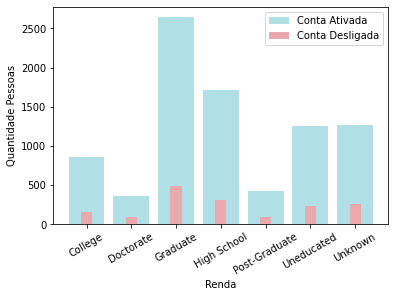

In [27]:
plt.bar(escola_status['Education_Level'], escola_status['contagem_on'], color = '#b0e0e6', label= 'Conta Ativada')
plt.bar(escola_status['Education_Level'], escola_status['contagem_off'], color= '#eaa9ac', label= 'Conta Desligada', width= 0.25)
plt.xticks(rotation=30)
plt.ylabel('Quantidade Pessoas')
plt.xlabel('Renda')
plt.legend()
plt.show()

- 7

In [28]:
lim_on_media = dados_origem.groupby('Attrition_Flag').agg(contagem = pd.NamedAgg('Customer_Age', 'mean')).reset_index()
lim_on_media

,Attrition_Flag,contagem
0,Attrited Customer,46.659496
1,Existing Customer,46.262118


# Contínuas

- 8

In [31]:
lim_age = dados_origem.groupby('Customer_Age').agg(Media_Limite = pd.NamedAgg('Credit_Limit', 'mean')).reset_index()
lim_age

,Customer_Age,Media_Limite
0,26,4591.953846
1,27,5532.996875
2,28,8910.103448
3,29,7457.260714
4,30,6466.075714
5,31,8477.200000
6,32,8170.900943
7,33,7455.800000
8,34,7364.219863
9,35,7132.426630


No handles with labels found to put in legend.


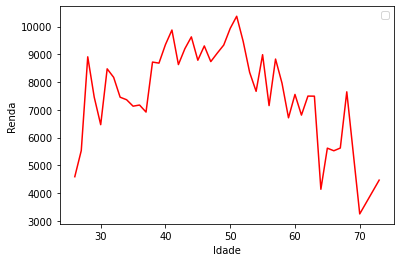

In [35]:
plt.plot(lim_age['Customer_Age'], lim_age['Media_Limite'], color= 'r')
plt.ylabel('Renda')
plt.xlabel('Idade')
plt.legend()

- 9

In [40]:
esc_lim_media = dados_origem.groupby('Education_Level').agg(Media_Limite = pd.NamedAgg('Credit_Limit', 'mean')).reset_index()
esc_lim_media

,Education_Level,Media_Limite
0,College,8684.536130
1,Doctorate,8413.258980
2,Graduate,8566.100927
3,High School,8605.823547
4,Post-Graduate,8862.560465
5,Uneducated,8899.509011
6,Unknown,8491.798947


No handles with labels found to put in legend.


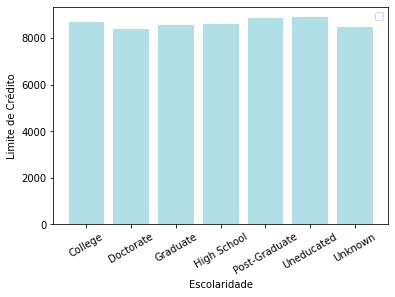

In [43]:
plt.bar(esc_lim_media['Education_Level'], esc_lim_media['Media_Limite'], color = '#b0e0e6')
plt.xticks(rotation=30)
plt.ylabel('Limite de Crédito')
plt.xlabel('Escolaridade')
plt.legend()
plt.show()

- 10

In [48]:
age_renda = dados_origem.groupby('Income_Category').agg(Media_Limite = pd.NamedAgg('Customer_Age', 'mean')).reset_index()
age_renda

,Income_Category,Media_Limite
0,$120K +,47.603851
1,$40K - $60K,46.087151
2,$60K - $80K,45.968616
3,$80K - $120K,46.428013
4,Less than $40K,46.297950
5,Unknown,46.274281


- 11

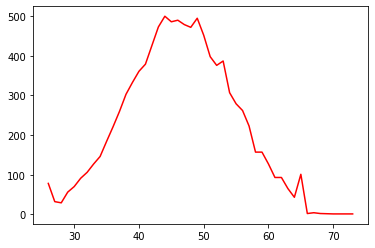

In [60]:
ages = dados_origem.groupby('Customer_Age').agg(Contagem = pd.NamedAgg('CLIENTNUM', 'count')).reset_index()
ages
plt.plot(ages['Customer_Age'], ages['Contagem'], color= 'r')


- 12

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

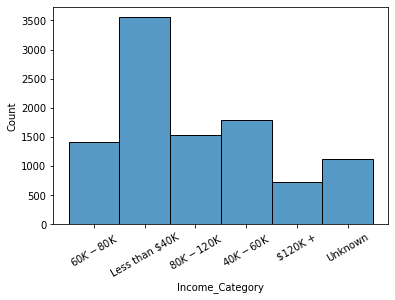

In [64]:
sns.histplot(dados_origem['Income_Category'])
plt.xticks(rotation=30)

- 13

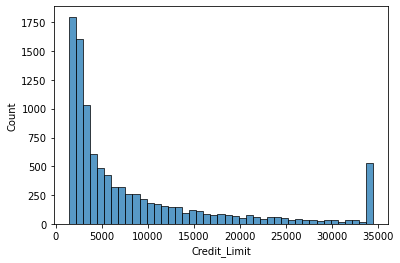

In [62]:
sns.histplot(dados_origem['Credit_Limit'])